Day 1:

## Prediction and Performance in the Machine Learning Regime

In [1]:
import os
import os.path
import time
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import cvxpy as cp

tf.keras.utils.set_random_seed(42)

In [2]:
images_path = 'images/'
data_path = 'data/neural-nets/'

The following is an example of data containing nonlinear signal and moderate noise.

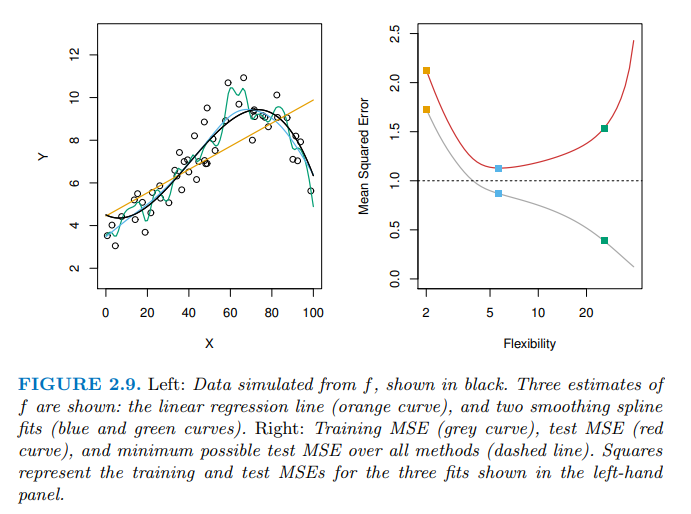

In [4]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'error_vs_flexibility_for_semi_nonlinear_data.PNG'))

- increasing model flexibility typically leads to better error measurements using in-sample training data.  

- When evaluating a model on out-of-sample test data, increasing the flexibility of a model typically leads to better error measurements initially, but eventually the error worsens as the model flexibility gets too.  

- This is due to the model fitting the in-sample noise rather than the signal.  

- The following is an example of data containing linear signal and moderate noise.

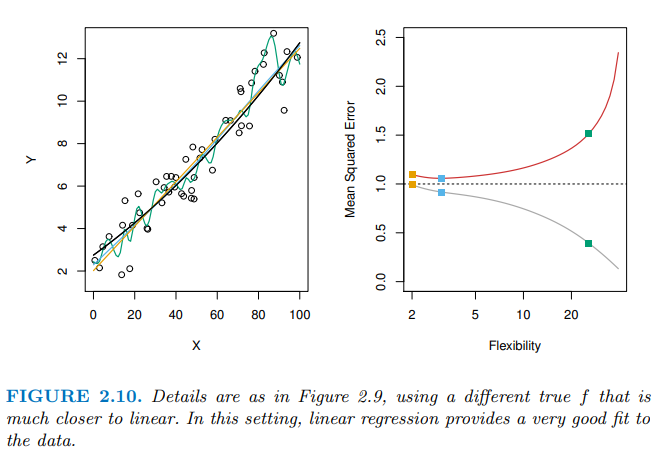

In [5]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'error_vs_flexibility_for_linear_data.PNG'))

- We typically wish to find the model which minimizes the error over the out-of-sample testing data set.  

- example of data containing nonlinear signal and very small noise.  

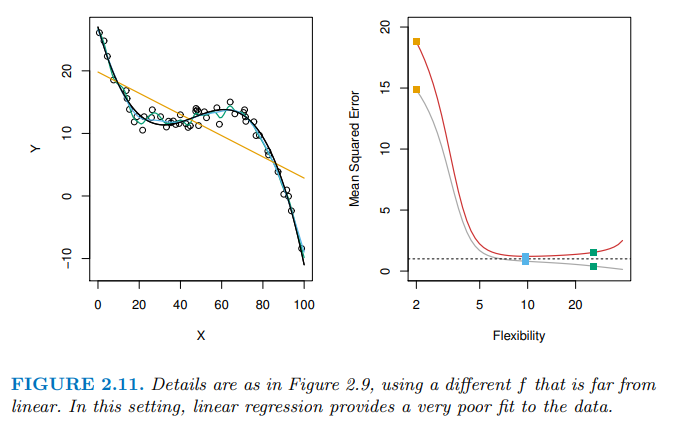

In [6]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'error_vs_flexibility_for_highly_nonlinear_data.PNG'))

This U-shaped curve, also known as convexity, is typically seen in measures of the out-of-sample test error and is caused from a tradeoff between the **bias** and **variance** of the model's predictions $(\hat{f})$  

Every error measurement can be **decomposed** into the variance of model's predictions (i.e. the spread of the predictions) and the bias of the model's predictions (i.e. the shift of the predictions).  

Average squared error $\approx MSE(\hat{Y}) := \mathbb{E}[(\hat{Y} - Y)^2] = Var(\hat{Y}) + (Bias(\hat{Y}))^2$  

A dream of building predictive models is to build a model that has **low variance** and **low bias**, however, these quantities are at odds with one another and typically as one goes up another goes down.  

The relative magnitude of the up and down movements of the bias and variance result in the quality of error a model can hope to achieve out-of-sample on unseen data.

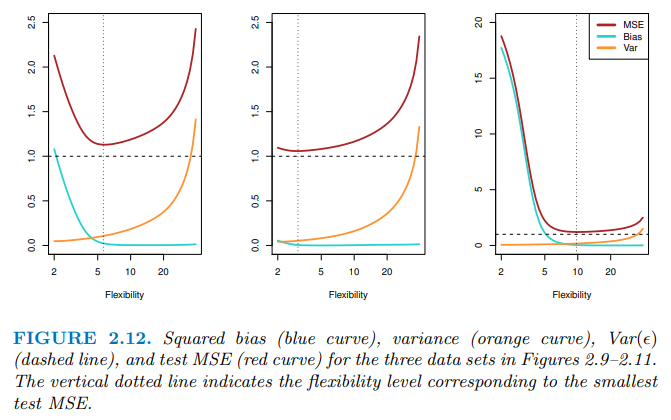

In [7]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'total_error_decomposition.PNG'))

### Bias-Variance Tradeoff

When our estimator is underperforming, how should we move forward?  

$MSE(\hat{Y}) = Var(\hat{Y}) + (Bias(\hat{Y}))^2$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

#set the random seed for reproducible results
rng = np.random.default_rng(42)

rng

Generator(PCG64) at 0x1F0FEC16260

In [10]:
y_true = 4

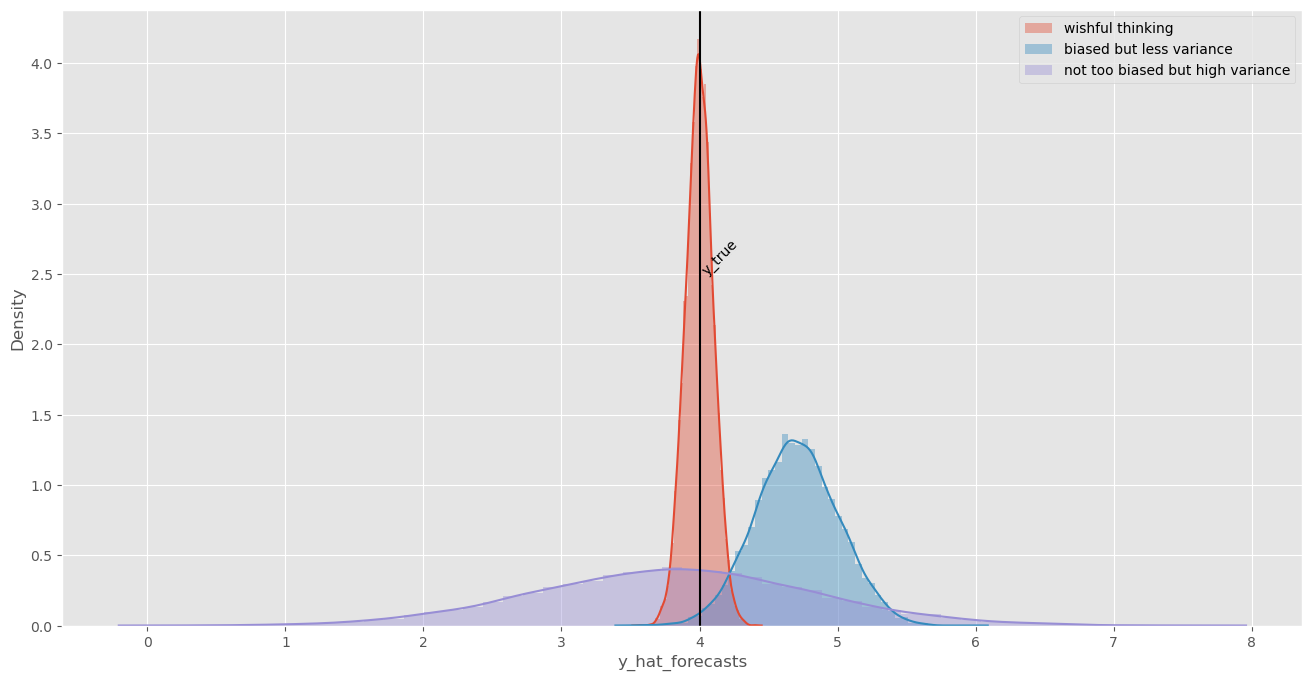

In [11]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(16,8))

sns.distplot(rng.normal(loc=y_true, scale=0.1, size=10000),
             kde=True, hist=True, label="wishful thinking")

sns.distplot(rng.normal(loc=4.7, scale=0.3, size=10000),
             kde=True, hist=True, label="biased but less variance")

sns.distplot(rng.normal(loc=3.8, scale=1, size=10000),
             kde=True, hist=True, label="not too biased but high variance")

plt.xlabel('y_hat_forecasts')
plt.axvline(x=y_true, color="black")
plt.text(y_true,2.5,'y_true',rotation=45)
plt.legend()
plt.show()

**Higher variance**: higher complexity (DL), complicated patterns  
**Higher bias:** less complex, rules of thumb, linear regression

## Relating Predictive Accuracy to Portfolio Performance

It turns out that there isn't just a nice statistical decomposition of MSE (in terms of estimator risk and bias), but there is also a financial interpretation as well (in terms of expected return and leverage):  

$MSE\widehat{(R_{t+1}(w))} = \mathbb(E) [(R_{t+1} - \widehat{R_{t+1}(w)})^2 | w] = ... = \mathbb(E)[R^2_{t+1}] - 2 \mathbb{E} [\widehat{\pi _t (w)} R_{t+1} | w] + \mathbb{E} [\widehat{\pi _t (w)^2} | w]$  


The above equation gives an expected return / leverage tradeoff using a **financial decomposition of the mean-squared error.**

Another common way to measure model value from a statistical perspective is to use an adaptation of the traditional in-sample (adjusted)  R2 , called the out-of-sample  R2 , which is:  

$R^2_{OOS} = 1 - $ **FINISH**

## Is a Large # of Parameters Always Bad?

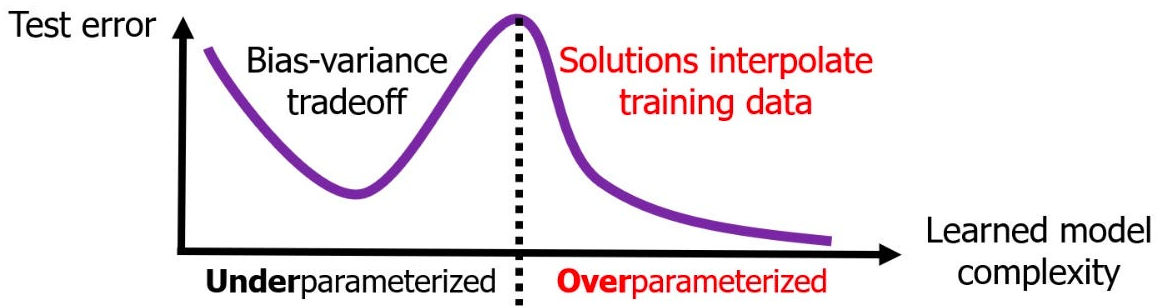

In [12]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'double_descent_II.png'))

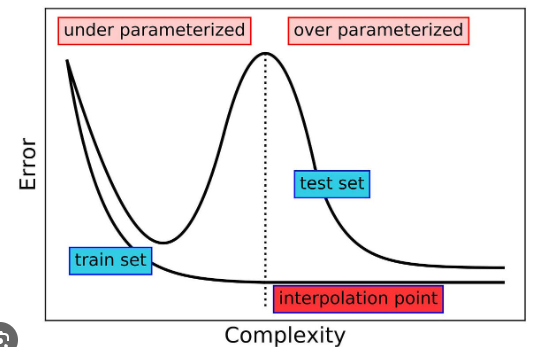

In [13]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'double_descent_III.png'))

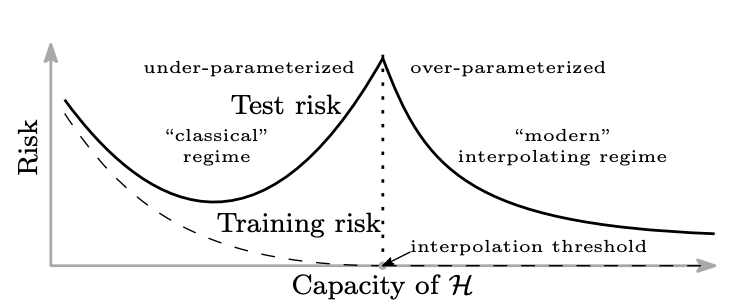

In [14]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'double_descent_I.png'))

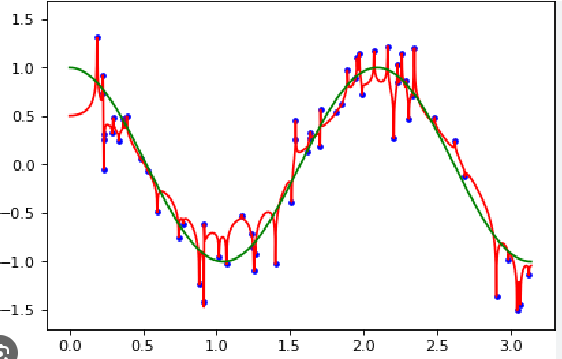

In [15]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'interpolation_estimators_II.png'))

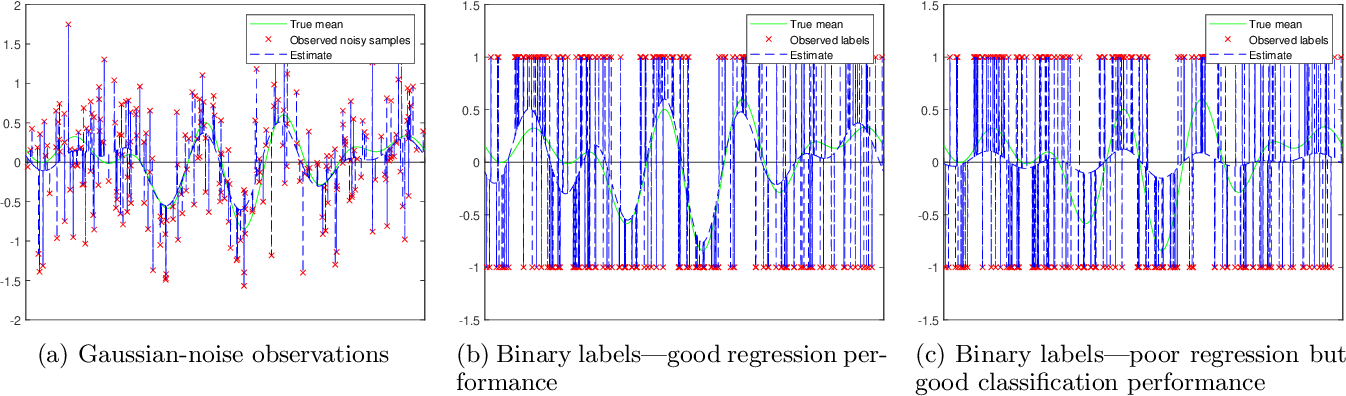

In [16]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'interpolation_estimators_I.png'))

By increasing the parameters (**overparameterization**), you can go past the typical overfitting error area.  
Still leads to overfitting but it doesn't hurt, and error drops significantly.  
Made bias-variance tradeoff kinda irrelevant!!! Changed the game completely.  

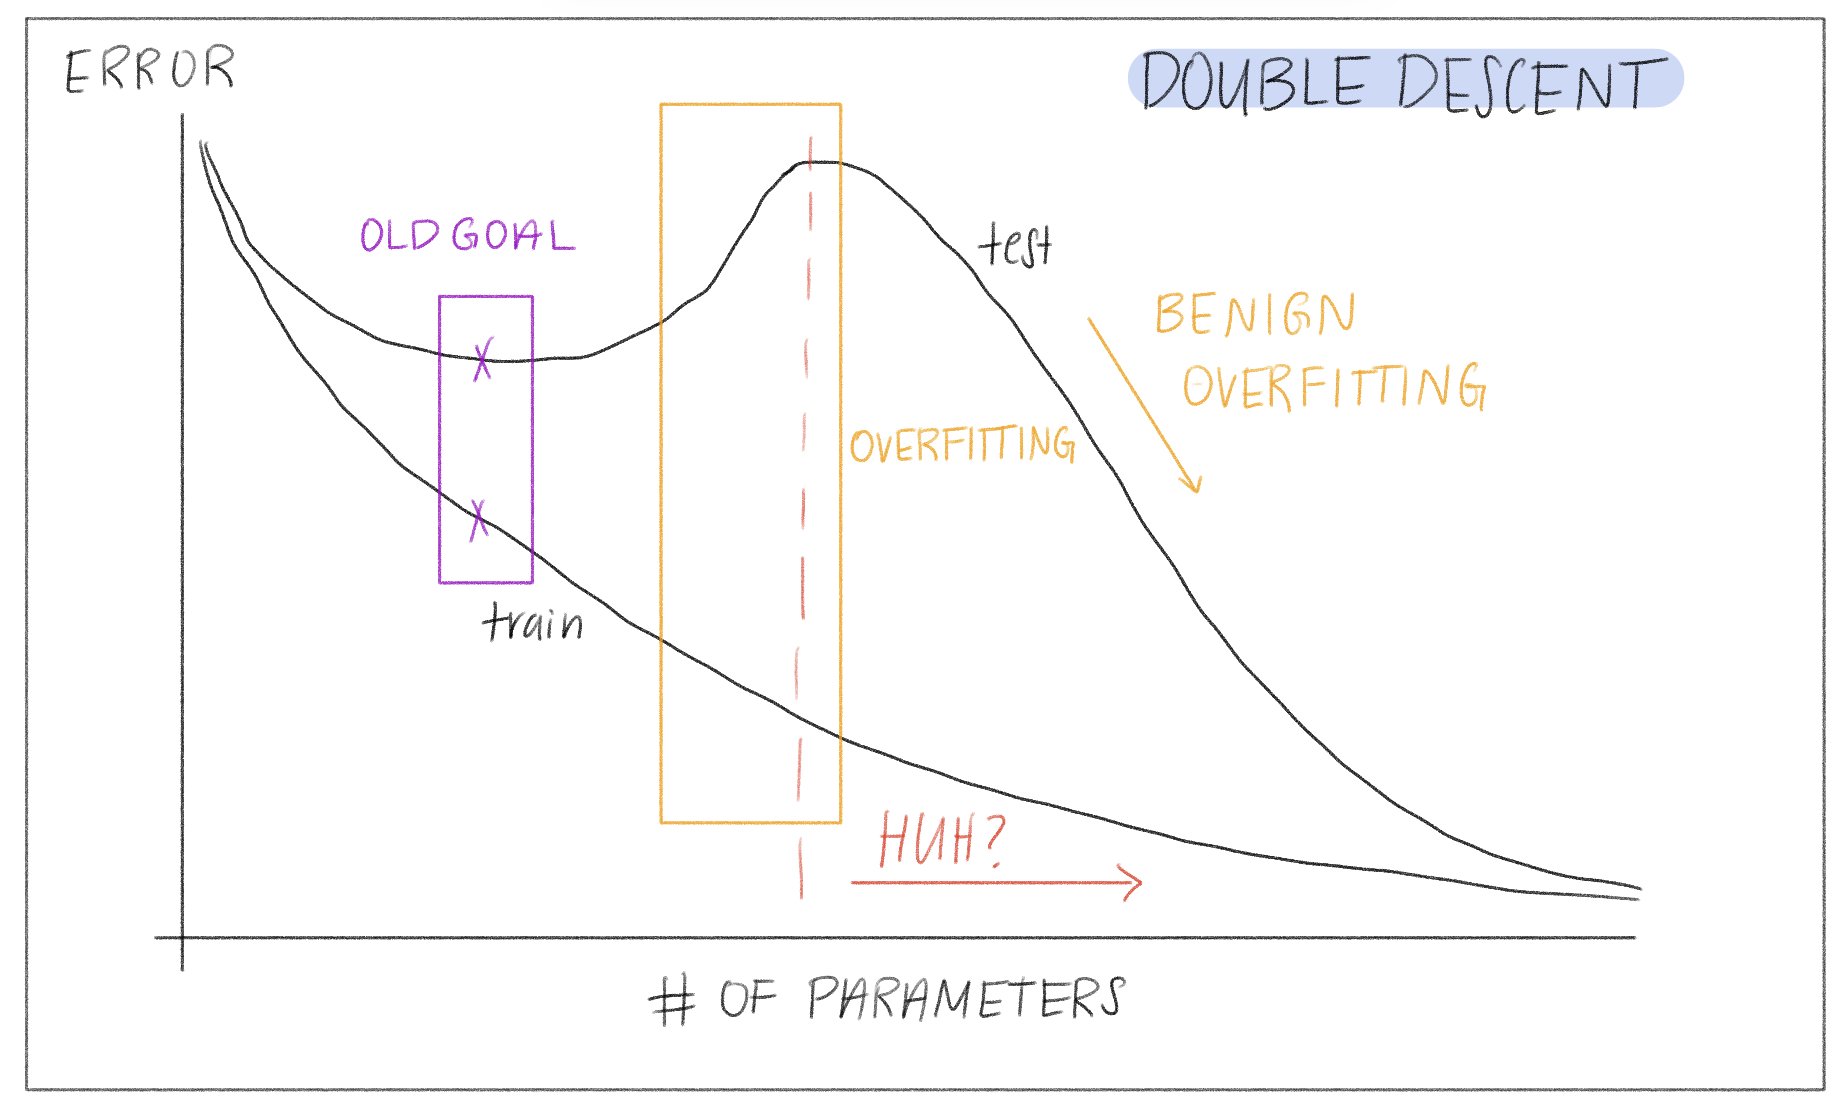

In [17]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'double-descent.png'))

The **large** part of large language models.

## Virtue of Complexity in Return Prediction: Empirical Evidence from Market Timing

Most portfolio managers and quants realize empirically that you need complex models to predict well out-of-sample.  

Intuitively, it feels like thousands of features, multiple horizons, highly nonlinear models, sophisticated optimization with a large number of constraints, and models with numerous parameters and hyperparameters may be **overkill**.  
- most will quickly find that it's optimal if not necessary in context of live trading; at least when you have massive cross-sections or very fine-grained data.  

It turns out this hard-earned experience is now something that you can mathematically prove.  

**Virtue of Complexity**: theorem that says under sufficient regularity conditions on the signal covariance matrix, and under sufficient regularization of the predictive model, the Sharpe ratio and the out-of-sample $R^2$ are increasing concave functions of a measure of model complexity.

## Data

The forecast target is the monthly return of the CRSP (Center for Research in Security Prices) S&P 500 value-weighted index. When you take the S&P 500 and subtract some measure of the risk-free rate, this target is called **equity risk premium**.  

The features consist of 15 variables that are known to predict the stock market returns over time. They are fairly well known both in industry and in academia, and they were compiled by Goyal and Welch (2008).

In [18]:
file_name = 'Predictor_Data_Monthly_2022.csv'

In [21]:
# CRSP_SPvw includes dividends
# CRSP_SPvwx excluding dividends

# Note: Rapach, Zhou, Strauss calculate the equity premium using CRSP_SPvw (includes dividends) and lagged risk free rate
# Note: Goyal, Welch (2008) use Index and D12 and current risk free rate (not sure if they use lagged risk free rate or "current")

# This data list includes:
# b/m (book to market ratio),
# de (dividend payout ratio),
# dfr (default return spread; used to measure corporate bond returns relative to government bond returns),
# dfy (default yield spread; difference between BAA and AAA-rated corporate bond yields),
# dp (dividend price ratio),
# dy (dividend yield),
# ep (earnings price ratio),
# infl (inflation measured through the consumer price inded CPI),
# ltr (long-term bond rate of returns),
# lty (long-term bond yield),
# ntis (net equity expansion; a measure of corporate issuing activity),
# svar (stock variance),
# tbl (treasury bills),
# tms (term-spread),

COLUMNS = ["b/m", "de", "dfr", "dfy", "dp", "dy", "ep", "infl", "ltr", "lty", "ntis", "svar", "tbl", "tms", "returns_lag_1", "returns"]

def load_data(data_path, file_name):
    data_raw = pd.read_csv(os.path.join(data_path, file_name))
    data_raw["yyyymm"] = pd.to_datetime(data_raw["yyyymm"], format='%Y%m', errors='coerce')
    data_raw["Index"] = data_raw["Index"].str.replace(",", "")
    data_raw.set_index("yyyymm", inplace=True)
    data_raw[data_raw.columns] = data_raw[data_raw.columns].astype(float)
    data_raw.rename(columns={"Index":"prices"}, inplace=True)

    # Calculate missing columns according to the explaination in m Welch and Goyal (2008)
    data_raw["dfy"] = data_raw["BAA"] - data_raw["AAA"]
    data_raw["tms"] = data_raw["lty"] - data_raw["tbl"]
    data_raw["de"] = np.log(data_raw["D12"]) - np.log(data_raw["E12"])
    data_raw["dfr"] = data_raw["corpr"] - data_raw["ltr"]
    data_raw["lag_prices"] = data_raw["prices"].shift()
    data_raw["dp"] = np.log(data_raw["D12"]) - np.log(data_raw["prices"])
    data_raw["dy"] = np.log(data_raw["D12"]) - np.log(data_raw["lag_prices"])
    data_raw["ep"] = np.log(data_raw["E12"])  - np.log(data_raw["prices"])

    # All the variables should be lagged by at least one period so we are using a predictive regression, and not an explanatory / contemporaneous regression
    data_raw = data_raw.shift().copy()

    data_raw["returns"] = data_raw["CRSP_SPvw"] # data_raw["prices"].pct_change() # Maybe use CRSP_SPvw - Value weighted return
    data_raw["returns_lag_1"] = data_raw["returns"].shift()
    # returns = data_raw["returns"].copy()

    data = data_raw[COLUMNS].dropna()
    # returns = returns[returns.index.isin(data.index)]
    return data # , returns

In [22]:
# nber_data = load_nber(data_path, 'NBER_Cycle_Dates.csv') # if you want to investigate what the strategy does around recessions and other business cycles

data = load_data(data_path, 'Predictor_Data_Monthly_2022.csv')

In [23]:
data

b/m        de     dfr     dfy        dp        dy        ep  \
yyyymm                                                                         
1927-01-01  0.441476 -0.586175 -0.0022  0.0100 -2.973012 -2.956570 -2.386837   
1927-02-01  0.443706 -0.567601 -0.0019  0.0095 -2.942374 -2.963349 -2.374773   
1927-03-01  0.428501 -0.549182 -0.0019  0.0092 -2.979535 -2.932946 -2.430353   
1927-04-01  0.469765 -0.531456 -0.0170  0.0092 -2.976535 -2.970053 -2.445079   
1927-05-01  0.456754 -0.512916  0.0060  0.0090 -2.984225 -2.967143 -2.471309   
...              ...       ...     ...     ...       ...       ...       ...   
2022-08-01  0.218187 -1.083898  0.0054  0.0115 -4.160174 -4.072973 -3.076276   
2022-09-01  0.227429 -1.068101  0.0128  0.0108 -4.110113 -4.153480 -3.042012   
2022-10-01  0.249478 -1.052264  0.0243  0.0110 -4.005414 -4.103464 -2.953150   
2022-11-01  0.218935 -1.018245  0.0036  0.0116 -4.074095 -3.997260 -3.055849   
2022-12-01  0.207182 -0.983605  0.0250  0.0117 -4.118363 -4.066005 -3.134758   

                infl     ltr     lty      ntis      svar     tbl     tms  \
yyyymm                                                                     
1927-01-01  0.000000  0.0078  0.0354  0.050876  0.000465  0.0307  0.0047   
1927-02-01 -0.011299  0.0075  0.0351  0.050824  0.000470  0.0323  0.0028   
1927-03-01 -0.005714  0.0088  0.0347  0.051668  0.000287  0.0329  0.0018   
1927-04-01 -0.005747  0.0253  0.0331  0.046357  0.000924  0.0320  0.0011   
1927-05-01  0.000000 -0.0005  0.0333  0.050514  0.000603  0.0339 -0.0006   
...              ...     ...     ...       ...       ...     ...     ...   
2022-08-01 -0.000118  0.0270  0.0290 -0.006121  0.003188  0.0223  0.0067   
2022-09-01 -0.000354 -0.0421  0.0290 -0.009732  0.003349  0.0263  0.0027   
2022-10-01  0.002151 -0.0769  0.0352 -0.011292  0.004934  0.0313  0.0039   
2022-11-01  0.004056 -0.0139  0.0398 -0.015252  0.006504  0.0372  0.0026   
2022-12-01 -0.001010  0.0268  0.0389 -0.017011  0.006343  0.0415 -0.0026   

            returns_lag_1   returns  
yyyymm                               
1927-01-01       0.026937  0.026047  
1927-02-01       0.026047 -0.002910  
1927-03-01      -0.002910  0.045522  
1927-04-01       0.045522  0.007324  
1927-05-01       0.007324  0.013021  
...                   ...       ...  
2022-08-01      -0.081683  0.093766  
2022-09-01       0.093766 -0.040305  
2022-10-01      -0.040305 -0.091495  
2022-11-01      -0.091495  0.080248  
2022-12-01       0.080248  0.054166  

[1152 rows x 16 columns]

**Issue:** we have variables for up to February -- this is going to create lookahead bias/leakage.

**Q: would looking at the entire month be useful in any scenario?**  
- **Predictive Regression**: using yesterday's variables to predict today.  
- **Explanatory/Contemporaneous Regression**: just for explaining what caused something at a point in time.

In [24]:
data.describe().T

count      mean       std       min       25%       50%  \
b/m            1152.0  0.552159  0.268291  0.120510  0.323772  0.529101   
de             1152.0 -0.647478  0.327729 -1.244209 -0.869869 -0.636278   
dfr            1152.0  0.000452  0.014086 -0.097600 -0.005100  0.000600   
dfy            1152.0  0.011160  0.006781  0.003200  0.007000  0.009000   
dp             1152.0 -3.408696  0.476560 -4.523640 -3.846171 -3.374830   
dy             1152.0 -3.403723  0.474459 -4.530894 -3.837779 -3.366198   
ep             1152.0 -2.761218  0.420533 -4.836482 -2.986049 -2.810402   
infl           1152.0  0.002467  0.005266 -0.020548  0.000000  0.002419   
ltr            1152.0  0.004489  0.024952 -0.112400 -0.007625  0.003000   
lty            1152.0  0.049656  0.028082  0.006200  0.027400  0.041000   
ntis           1152.0  0.015991  0.025712 -0.055954  0.003618  0.015954   
svar           1152.0  0.002916  0.005998  0.000072  0.000695  0.001269   
tbl            1152.0  0.032931  0.030649  0.000100  0.003800  0.027750   
tms            1152.0  0.016725  0.012925 -0.036500  0.008200  0.017050   
returns_lag_1  1152.0  0.009452  0.054301 -0.287461 -0.016829  0.012951   
returns        1152.0  0.009476  0.054315 -0.287461 -0.016829  0.012951   

                    75%       max  
b/m            0.738709  2.028478  
de            -0.501955  1.379530  
dfr            0.005900  0.073700  
dfy            0.013025  0.056400  
dp            -3.043790 -1.873246  
dy            -3.039178 -1.912904  
ep            -2.481701 -1.774952  
infl           0.005081  0.058824  
ltr            0.016100  0.152300  
lty            0.067325  0.148200  
ntis           0.027028  0.177040  
svar           0.002491  0.073153  
tbl            0.050700  0.163000  
tms            0.025700  0.045500  
returns_lag_1  0.038778  0.414312  
returns        0.038927  0.414312

In [25]:
data.corr()

b/m        de       dfr       dfy        dp        dy  \
b/m            1.000000  0.321992 -0.018015  0.470278  0.856144  0.850224   
de             0.321992  1.000000  0.079232  0.532143  0.504755  0.501938   
dfr           -0.018015  0.079232  1.000000  0.020125 -0.020064 -0.000065   
dfy            0.470278  0.532143  0.020125  1.000000  0.404732  0.400134   
dp             0.856144  0.504755 -0.020064  0.404732  1.000000  0.993535   
dy             0.850224  0.501938 -0.000065  0.400134  0.993535  1.000000   
ep             0.719272 -0.207317 -0.084483  0.043944  0.739863  0.734733   
infl           0.079271 -0.227249  0.028621 -0.237192 -0.031318 -0.029415   
ltr            0.009850 -0.014028 -0.464968  0.073446  0.000820  0.009206   
lty            0.193946 -0.232012 -0.013959  0.066711  0.007631  0.006936   
ntis           0.032674  0.149345  0.013728 -0.180011  0.239645  0.232634   
svar           0.168351  0.354825 -0.134023  0.535255  0.166526  0.137812   
tbl            0.199496 -0.298266 -0.044052 -0.060586  0.042364  0.041209   
tms           -0.051681  0.203190  0.074135  0.288617 -0.083878 -0.082651   
returns_lag_1 -0.066065 -0.028269  0.105883 -0.107358 -0.065032 -0.056418   
returns       -0.046667 -0.014731  0.176028 -0.011734 -0.057368  0.055722   

                     ep      infl       ltr       lty      ntis      svar  \
b/m            0.719272  0.079271  0.009850  0.193946  0.032674  0.168351   
de            -0.207317 -0.227249 -0.014028 -0.232012  0.149345  0.354825   
dfr           -0.084483  0.028621 -0.464968 -0.013959  0.013728 -0.134023   
dfy            0.043944 -0.237192  0.073446  0.066711 -0.180011  0.535255   
dp             0.739863 -0.031318  0.000820  0.007631  0.239645  0.166526   
dy             0.734733 -0.029415  0.009206  0.006936  0.232634  0.137812   
ep             1.000000  0.141610  0.011862  0.189460  0.155185 -0.087810   
infl           0.141610  1.000000 -0.102512  0.215544 -0.056484 -0.204887   
ltr            0.011862 -0.102512  1.000000  0.056426 -0.046408  0.092892   
lty            0.189460  0.215544  0.056426  1.000000 -0.062641 -0.104896   
ntis           0.155185 -0.056484 -0.046408 -0.062641  1.000000 -0.039295   
svar          -0.087810 -0.204887  0.092892 -0.104896 -0.039295  1.000000   
tbl            0.280452  0.247157  0.054060  0.906785  0.032532 -0.151910   
tms           -0.253403 -0.117775 -0.005597  0.022438 -0.213250  0.132319   
returns_lag_1 -0.051666  0.037878 -0.079497 -0.005148 -0.044542 -0.214211   
returns       -0.053531  0.007432  0.076150 -0.011348 -0.069922 -0.207513   

                    tbl       tms  returns_lag_1   returns  
b/m            0.199496 -0.051681      -0.066065 -0.046667  
de            -0.298266  0.203190      -0.028269 -0.014731  
dfr           -0.044052  0.074135       0.105883  0.176028  
dfy           -0.060586  0.288617      -0.107358 -0.011734  
dp             0.042364 -0.083878      -0.065032 -0.057368  
dy             0.041209 -0.082651      -0.056418  0.055722  
ep             0.280452 -0.253403      -0.051666 -0.053531  
infl           0.247157 -0.117775       0.037878  0.007432  
ltr            0.054060 -0.005597      -0.079497  0.076150  
lty            0.906785  0.022438      -0.005148 -0.011348  
ntis           0.032532 -0.213250      -0.044542 -0.069922  
svar          -0.151910  0.132319      -0.214211 -0.207513  
tbl            1.000000 -0.401141      -0.015557 -0.018689  
tms           -0.401141  1.000000       0.025705  0.019662  
returns_lag_1 -0.015557  0.025705       1.000000  0.076971  
returns       -0.018689  0.019662       0.076971  1.000000

**Why do we want correlation?** 
Want to know how correlated X and Y are.  
Sometimes, X's are too correlated, $\rightarrow$ use PCA to help  

In [26]:
(abs(data.corr()[['returns']])).sort_values(by='returns', ascending=False)

returns
returns        1.000000
svar           0.207513
dfr            0.176028
returns_lag_1  0.076971
ltr            0.076150
ntis           0.069922
dp             0.057368
dy             0.055722
ep             0.053531
b/m            0.046667
tms            0.019662
tbl            0.018689
de             0.014731
dfy            0.011734
lty            0.011348
infl           0.007432

Take correlation matrix and slice it on the returns column -- we only really care about absolute value of the correlation, not whether it's negative or positive.  

Interpretation: stock variance is highly correlated with returns, so is default return spread.

<Axes: xlabel='yyyymm'>

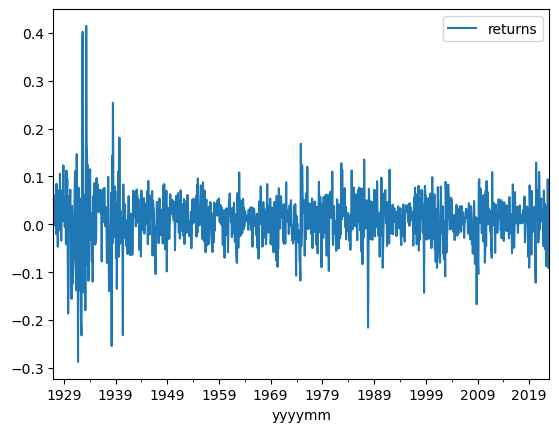

In [27]:
data[['returns']].plot()

<Axes: xlabel='yyyymm'>

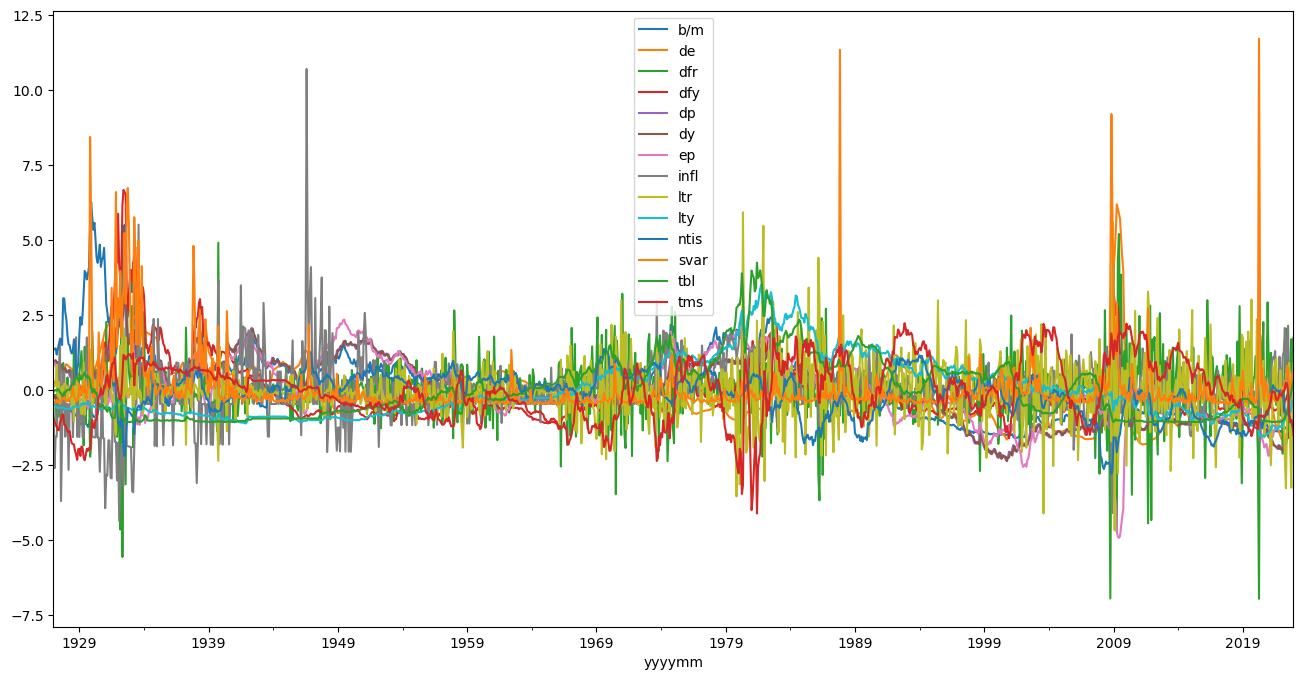

In [28]:
((data.iloc[:, :-2] - data.iloc[:, :-2].mean()) / data.iloc[:, :-2].std()).plot(figsize=(16,8))

In [29]:
# percentage of the data used to train in a time-series split
training_percentage = 0.9

# number of samples, number of training samples, number of years in training set, number of years in testing set
data.shape[0], round(data.shape[0]* training_percentage), round(data.shape[0]* training_percentage) / 12, (data.shape[0] - round(data.shape[0]* training_percentage)) / 12

(1152, 1037, 86.41666666666667, 9.583333333333334)

In [30]:
# split data sample into (X_{t-1}, Y_t)
X = data.drop(columns=['returns'])
Y = data[['returns']]

# split (X_{t-1}, Y_t) into time-series training and testing sets
X_train = X.iloc[0: round(data.shape[0]* training_percentage)]
X_test = X.iloc[round(data.shape[0]* training_percentage):]

Y_train = Y.iloc[0: round(data.shape[0]* training_percentage)]
Y_test = Y.iloc[round(data.shape[0]* training_percentage):]


X_sub_train = X_train.iloc[0: round(X_train.shape[0]* training_percentage)]
Y_sub_train = Y_train.iloc[0: round(X_train.shape[0]* training_percentage)]

X_validation = X_train.iloc[round(X_train.shape[0]* training_percentage):]
Y_validation = Y_train.iloc[round(X_train.shape[0]* training_percentage):]

**Why a validation set?**  
Should think of the testing set as a set you take aside and don't use it until you're certain your model is ready.  

You wanna do all your trial and error on your subtrain and validation sets, to **prevent the model from picking up on patterns that won't hold out of sample**.  

You might find that a model that performs really well on the training and validation set, but doesn't perform well on the test - picked up on patterns that were very specific to the period of time in the training set. That happens, it's okay.  

Once you've seen the test set, you've seen it, and you are peeking and picking up patterns from data you aren't supposed to know about yet.

Note: in practice, you would do rolling predictions where you build a sequence of models, rather than just a single model at a single time-series split.  

This is called **backtesting**.  

Why is backtesting better?  
- idk

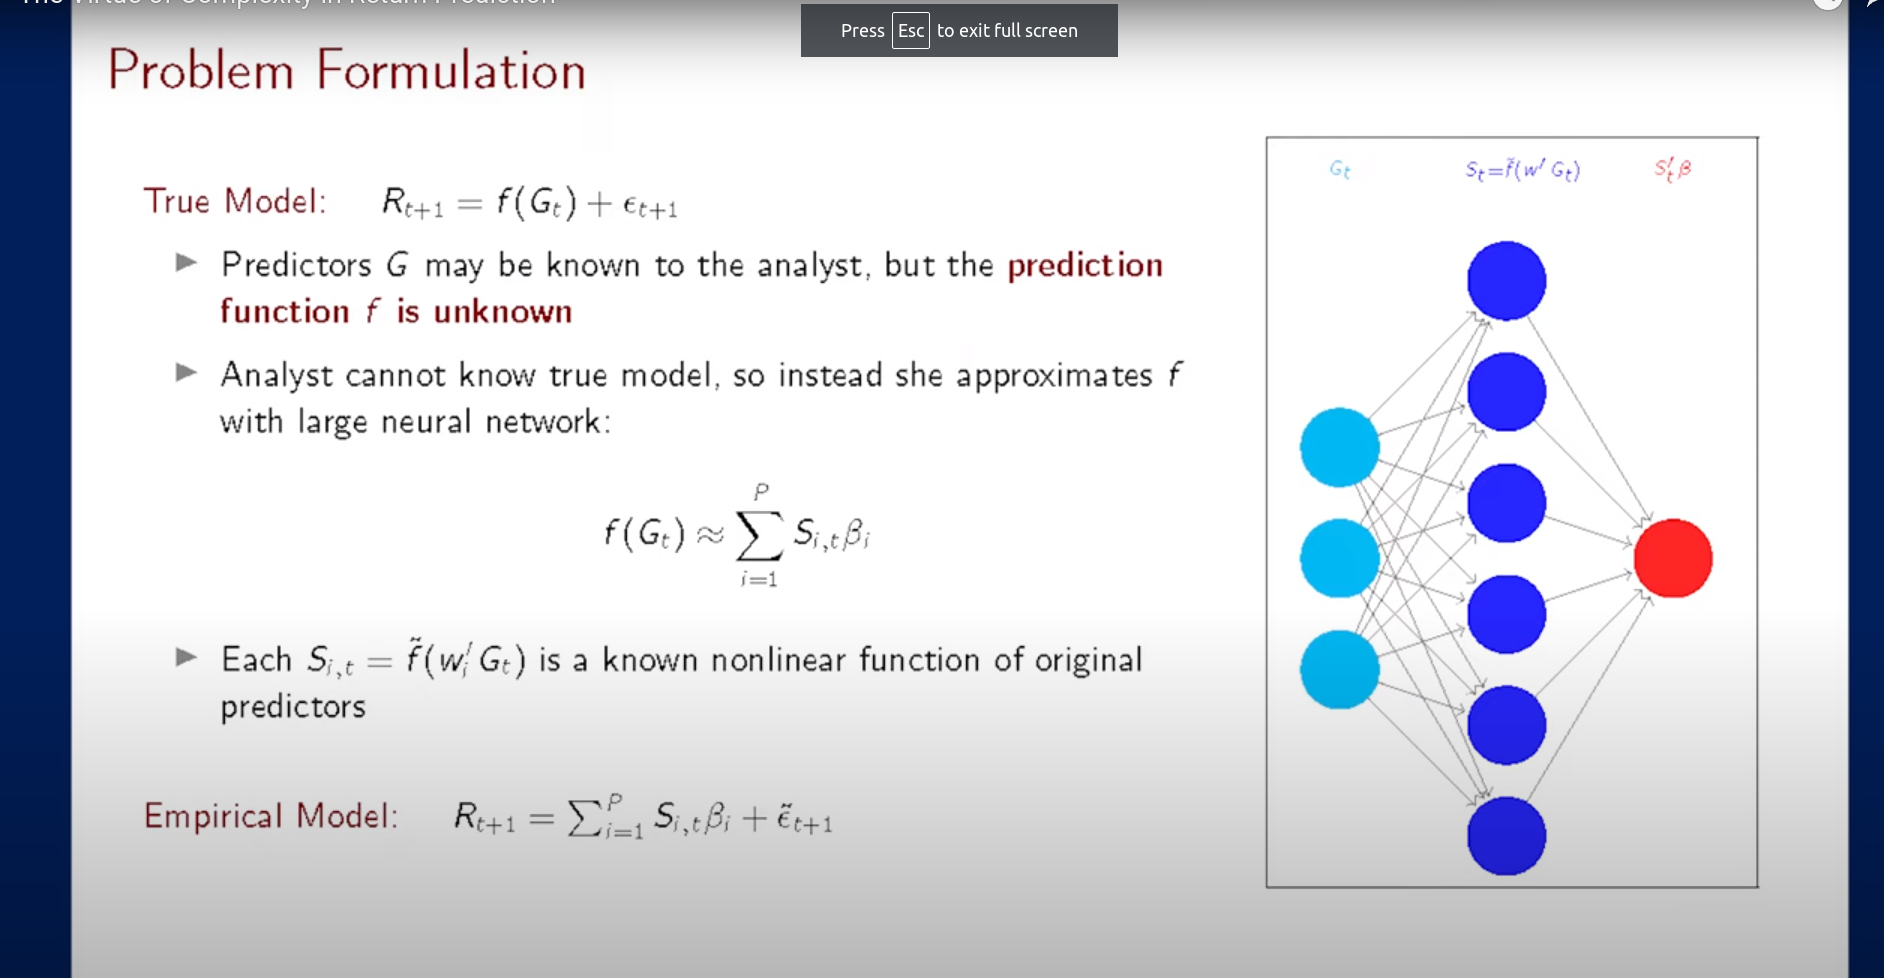

In [30]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'benign_overfitting_in_return_prediction.png'))

## Implementing MLPs with Keras API

Instead of doing linear PCA and linear regression, we are doing nonlinear PCA and nonlinear regression. This technique is called **dense neural networks**, of **MLP**, or **fully-connected neural networks**.

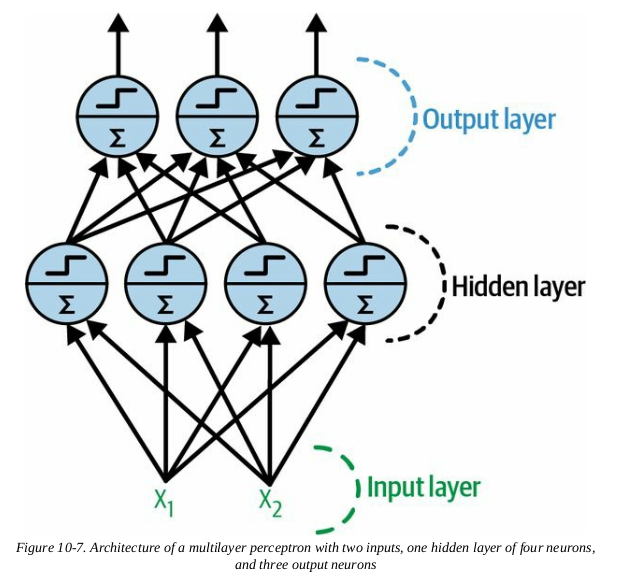

In [31]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'multi_layer_perceptron.png'))

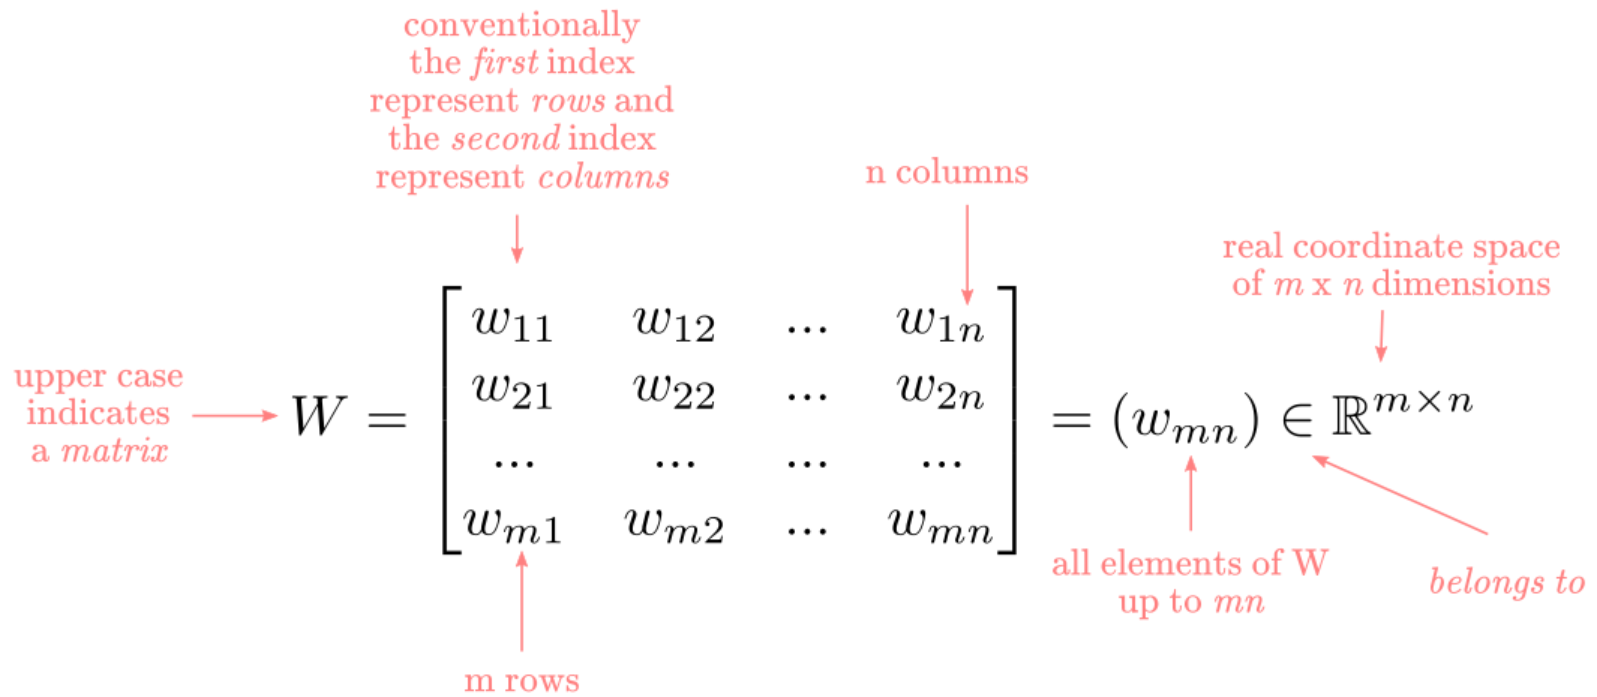

In [32]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'weight_matrix_for_dense_networks.png'))

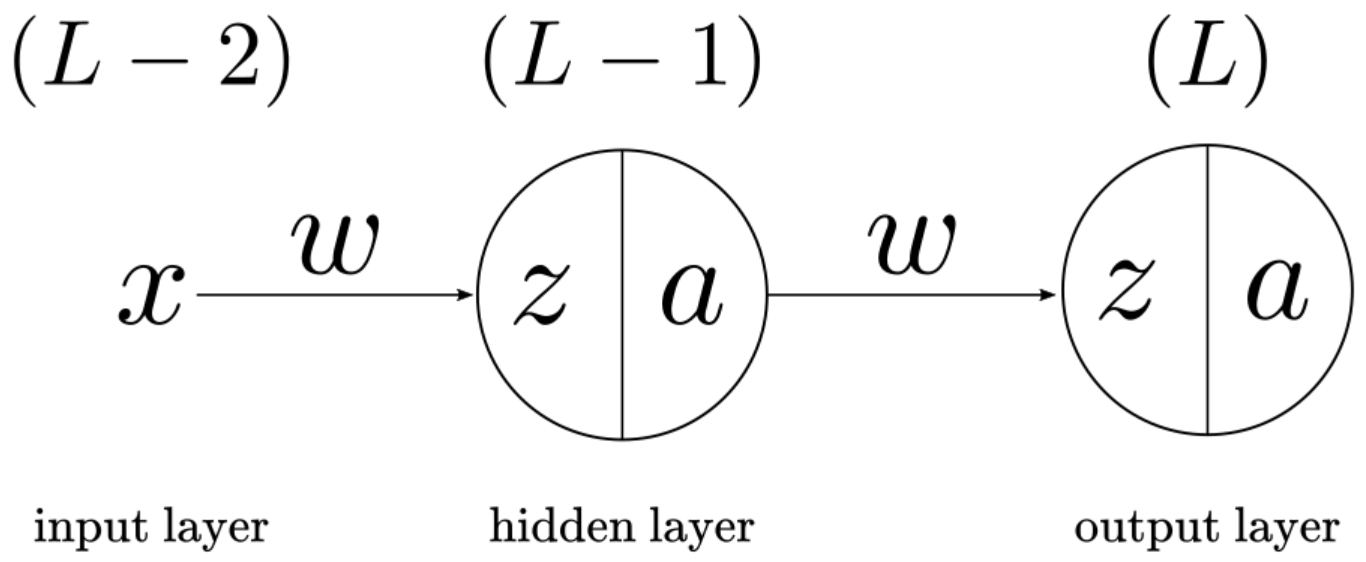

In [33]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'general_structure_for_dense_neural_network_input_hidden_output.png'))

**In math:** $Y = a(aw(ax))$

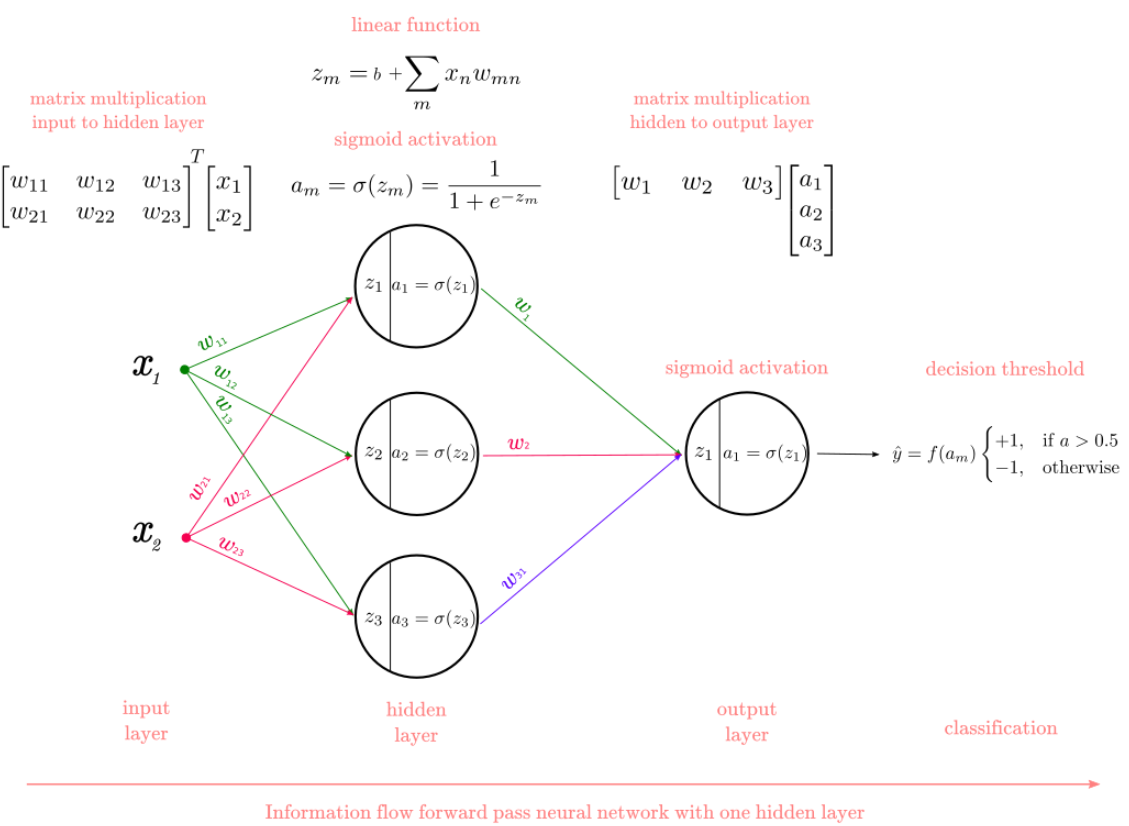

In [34]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'two_layer_dense_neural_network.png'))

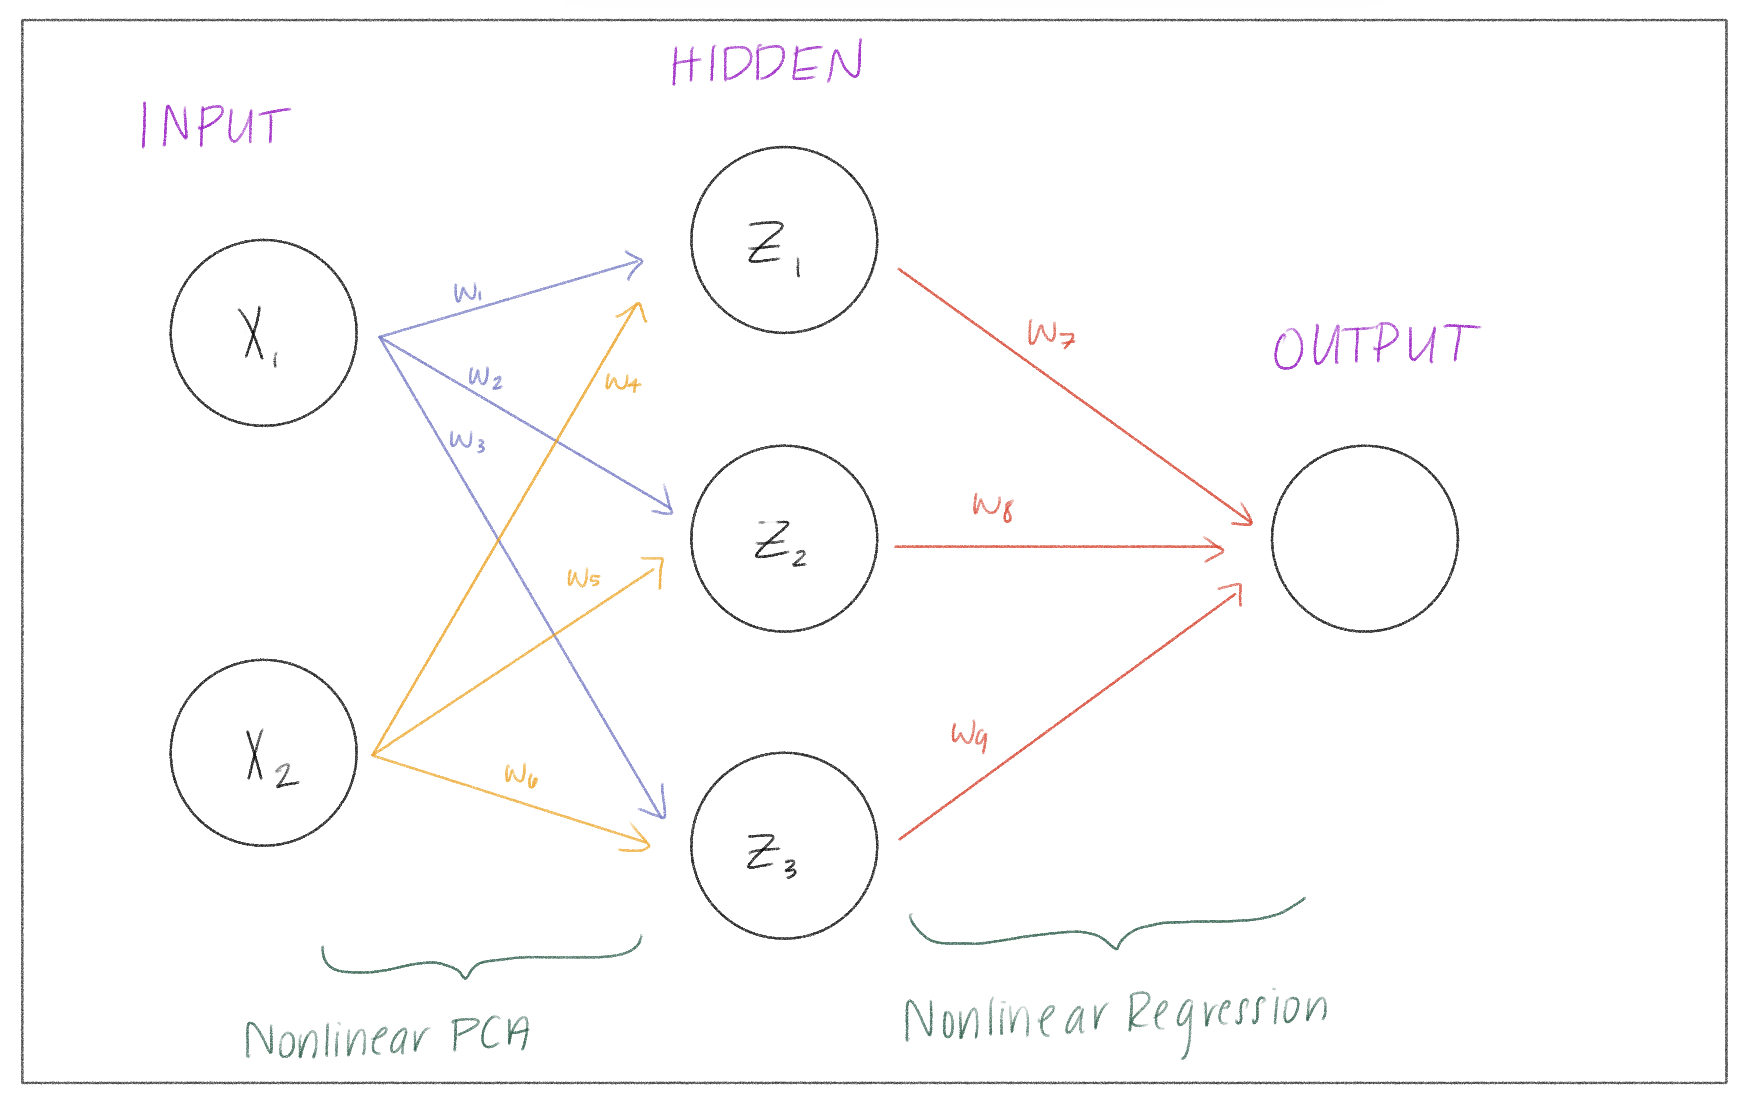

In [36]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'dense_nn.jpg'))

## Data

The forecast target is the monthly return of the CRSP (Center for Research in Security Prices) S&P 500 value-weighted index. When you take the S&P 500 and subtract some measure of the risk-free rate, this target is called equity risk premium.  

The features consist of 15 variables that are known to predict the stock market returns over time. They are fairly well known both in industry and in academia, and they were compiled by Goyal and Welch (2008).  

The data sample ranges from 1926 to 2020.

Back in the 60's and 70's, people didn't know that much about these variables.  

We are simulating: if we knew that these variables were predictive, how would we have used them?  

Assumptions:  
- The market would have reacted a different way. Uses a bit of lookahead bias. We didn't know the market would have reacted this way. If they knew about these factors back then, the market would have behaved differently; things would have been priced differently in reaction to the importance of these features.  
    - Some of these variables might have not even been measured during the 60's and 70's.  
    - **How to fix:** introduce access to variables only when they become important/known. So the model can't use book-to-market until the 90's, etc.  
    - **Another way to fix:** maybe you take all measurable variables at these points in time (like 500 variables) and screen them/preselect using PCA or some algorithm to whittle them down.

**Leakage: most timeseries models end up failing cuz of leakage (lookahead bias)**  

In [4]:
import pandas as pd
import os
import numpy as np

In [2]:
# CRSP_SPvw includes dividends
# CRSP_SPvwx excluding dividends

# Note: Rapach, Zhou, Strauss calculate the equity premium using CRSP_SPvw (includes dividends) and lagged risk free rate
# Note: Goyal, Welch (2008) use Index and D12 and current risk free rate (not sure if they use lagged risk free rate or "current")

# This data list includes:
# b/m (book to market ratio),
# de (dividend payout ratio),
# dfr (default return spread; used to measure corporate bond returns relative to government bond returns),
# dfy (default yield spread; difference between BAA and AAA-rated corporate bond yields),
# dp (dividend price ratio),
# dy (dividend yield),
# ep (earnings price ratio),
# infl (inflation measured through the consumer price inded CPI),
# ltr (long-term bond rate of returns),
# lty (long-term bond yield),
# ntis (net equity expansion; a measure of corporate issuing activity),
# svar (stock variance),
# tbl (treasury bills),
# tms (term-spread),
# as well as one lag of the market return



COLUMNS = ["b/m", "de", "dfr", "dfy", "dp", "dy", "ep", "infl", "ltr", "lty", "ntis", "svar", "tbl", "tms", "returns_lag_1", "returns"]


# def load_nber(data_path, file_name):
#     """Used to create a data set that you can use to investigate trends around recessions and other business cycles."""
#     nber = pd.read_csv(os.path.join(data_path, file_name))[1:]
#     nber["peak"] = pd.to_datetime(nber["peak"])
#     nber["trough"] = pd.to_datetime(nber["trough"])
#     return nber

data_path = 'data/neural-nets/'
file_name = 'Predictor_Data_Monthly_2022.csv'

def load_data(data_path, file_name):
    data_raw = pd.read_csv(os.path.join(data_path, file_name))
    data_raw["yyyymm"] = pd.to_datetime(data_raw["yyyymm"], format='%Y%m', errors='coerce')
    data_raw["Index"] = data_raw["Index"].str.replace(",", "")
    data_raw.set_index("yyyymm", inplace=True)
    data_raw[data_raw.columns] = data_raw[data_raw.columns].astype(float)
    data_raw.rename(columns={"Index":"prices"}, inplace=True)

    # Calculate missing columns according to the explaination in m Welch and Goyal (2008)
    data_raw["dfy"] = data_raw["BAA"] - data_raw["AAA"]
    data_raw["tms"] = data_raw["lty"] - data_raw["tbl"]
    data_raw["de"] = np.log(data_raw["D12"]) - np.log(data_raw["E12"])
    data_raw["dfr"] = data_raw["corpr"] - data_raw["ltr"]
    data_raw["lag_prices"] = data_raw["prices"].shift()
    data_raw["dp"] = np.log(data_raw["D12"]) - np.log(data_raw["prices"])
    data_raw["dy"] = np.log(data_raw["D12"]) - np.log(data_raw["lag_prices"])
    data_raw["ep"] = np.log(data_raw["E12"])  - np.log(data_raw["prices"])

    # All the variables should be lagged by at least one period so we are using a predictive regression, and not an explanatory / contemporaneous regression
    data_raw = data_raw.shift().copy()

    data_raw["returns"] = data_raw["CRSP_SPvw"] # data_raw["prices"].pct_change() # Maybe use CRSP_SPvw - Value weighted return
    data_raw["returns_lag_1"] = data_raw["returns"].shift()
    # returns = data_raw["returns"].copy()

    data = data_raw[COLUMNS].dropna()
    # returns = returns[returns.index.isin(data.index)]
    return data # , returns

In [6]:
data = load_data(data_path, 'Predictor_Data_Monthly_2022.csv')
data

b/m        de     dfr     dfy        dp        dy        ep  \
yyyymm                                                                         
1927-01-01  0.441476 -0.586175 -0.0022  0.0100 -2.973012 -2.956570 -2.386837   
1927-02-01  0.443706 -0.567601 -0.0019  0.0095 -2.942374 -2.963349 -2.374773   
1927-03-01  0.428501 -0.549182 -0.0019  0.0092 -2.979535 -2.932946 -2.430353   
1927-04-01  0.469765 -0.531456 -0.0170  0.0092 -2.976535 -2.970053 -2.445079   
1927-05-01  0.456754 -0.512916  0.0060  0.0090 -2.984225 -2.967143 -2.471309   
...              ...       ...     ...     ...       ...       ...       ...   
2022-08-01  0.218187 -1.083898  0.0054  0.0115 -4.160174 -4.072973 -3.076276   
2022-09-01  0.227429 -1.068101  0.0128  0.0108 -4.110113 -4.153480 -3.042012   
2022-10-01  0.249478 -1.052264  0.0243  0.0110 -4.005414 -4.103464 -2.953150   
2022-11-01  0.218935 -1.018245  0.0036  0.0116 -4.074095 -3.997260 -3.055849   
2022-12-01  0.207182 -0.983605  0.0250  0.0117 -4.118363 -4.066005 -3.134758   

                infl     ltr     lty      ntis      svar     tbl     tms  \
yyyymm                                                                     
1927-01-01  0.000000  0.0078  0.0354  0.050876  0.000465  0.0307  0.0047   
1927-02-01 -0.011299  0.0075  0.0351  0.050824  0.000470  0.0323  0.0028   
1927-03-01 -0.005714  0.0088  0.0347  0.051668  0.000287  0.0329  0.0018   
1927-04-01 -0.005747  0.0253  0.0331  0.046357  0.000924  0.0320  0.0011   
1927-05-01  0.000000 -0.0005  0.0333  0.050514  0.000603  0.0339 -0.0006   
...              ...     ...     ...       ...       ...     ...     ...   
2022-08-01 -0.000118  0.0270  0.0290 -0.006121  0.003188  0.0223  0.0067   
2022-09-01 -0.000354 -0.0421  0.0290 -0.009732  0.003349  0.0263  0.0027   
2022-10-01  0.002151 -0.0769  0.0352 -0.011292  0.004934  0.0313  0.0039   
2022-11-01  0.004056 -0.0139  0.0398 -0.015252  0.006504  0.0372  0.0026   
2022-12-01 -0.001010  0.0268  0.0389 -0.017011  0.006343  0.0415 -0.0026   

            returns_lag_1   returns  
yyyymm                               
1927-01-01       0.026937  0.026047  
1927-02-01       0.026047 -0.002910  
1927-03-01      -0.002910  0.045522  
1927-04-01       0.045522  0.007324  
1927-05-01       0.007324  0.013021  
...                   ...       ...  
2022-08-01      -0.081683  0.093766  
2022-09-01       0.093766 -0.040305  
2022-10-01      -0.040305 -0.091495  
2022-11-01      -0.091495  0.080248  
2022-12-01       0.080248  0.054166  

[1152 rows x 16 columns]

**Sequence Data**:
Ex: "My name is Maci"  
How we represent it:  
- Rows are observations ("My", "name", "is", "Maci").  
- Columns are indicators/dummy variables/one-hot-encoded variables  
- Another complicated feature: **embeddings**  

A whole table (sentence) is an observation, and then you have many observations within that.  
In image data, the whole 3D grid of pixels is a singular observation

Neural nets: regressions in parallel with one another, along with activation functions.

ChatGPT: **classification**, predicting $\mathbb{P}$(next word | previous words)

In [9]:
images_path = 'images/'
import tensorflow as tf

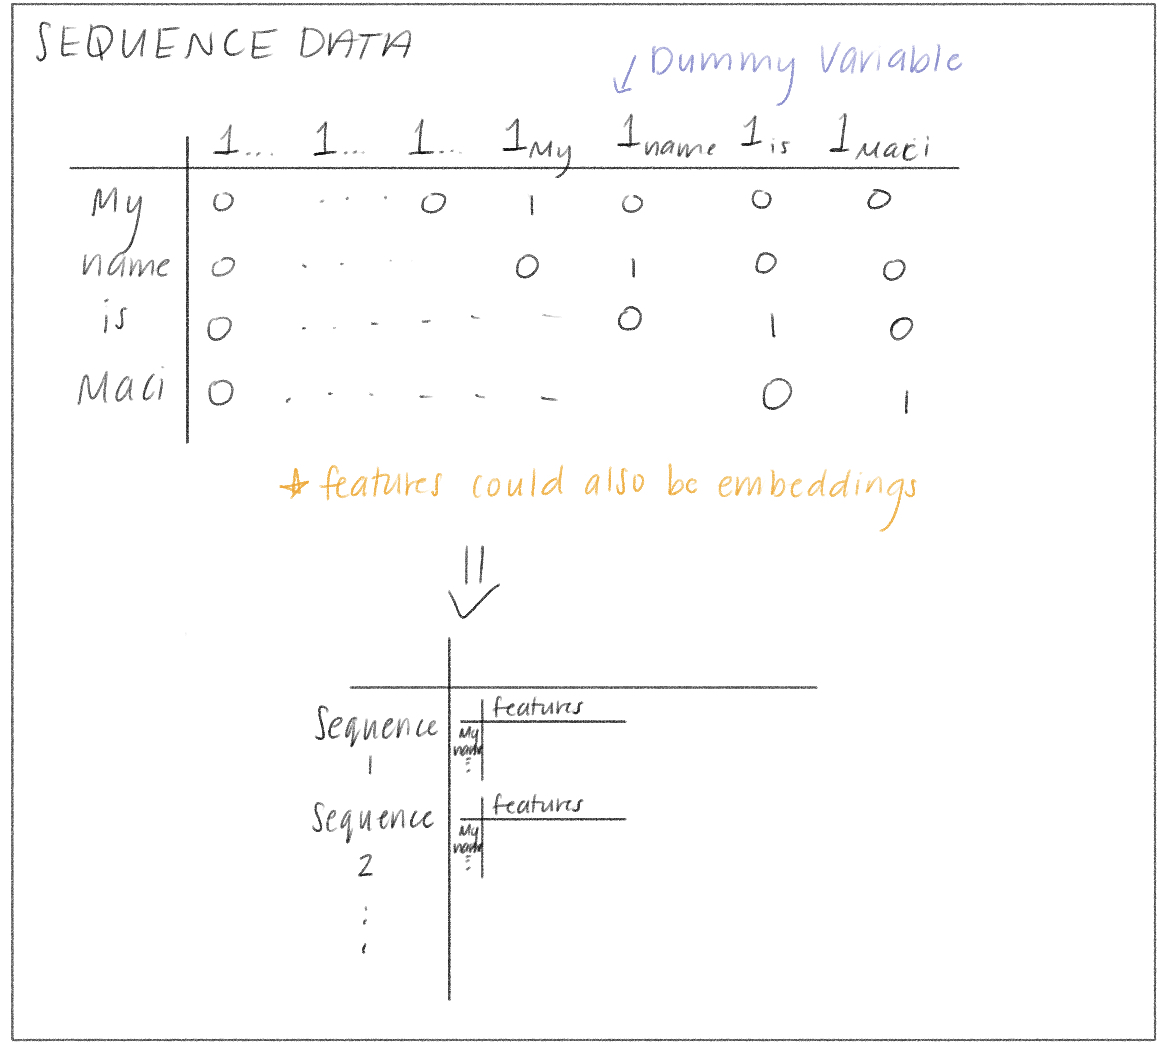

In [10]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'sequence-data.jpg'))

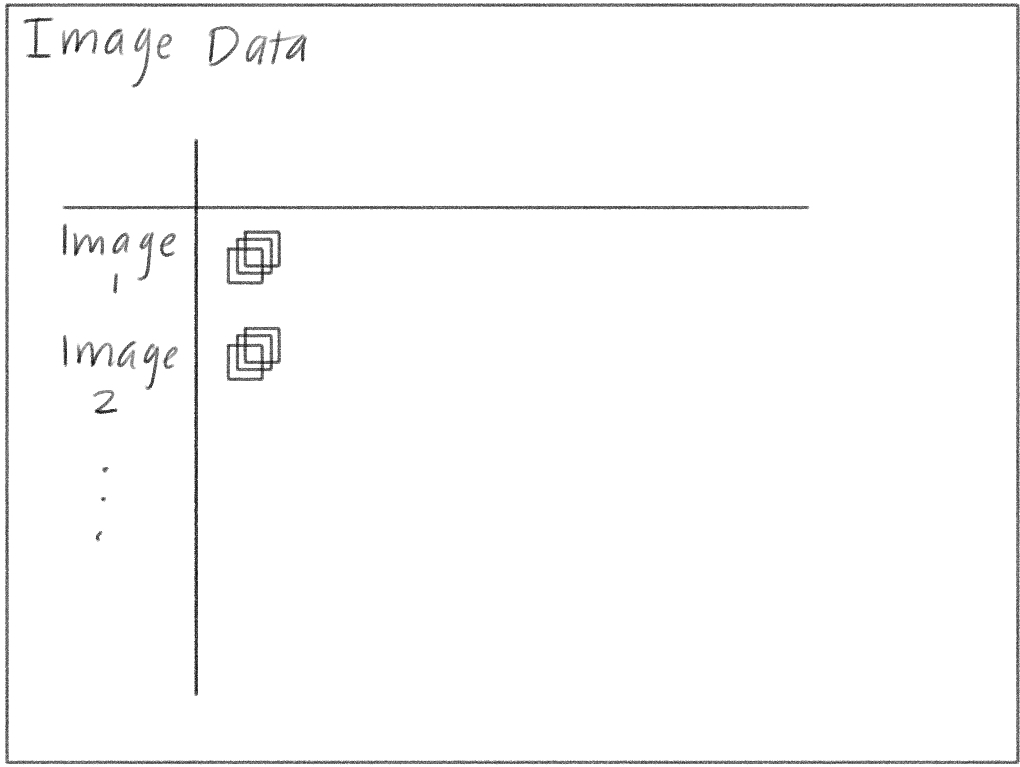

In [11]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'image-data.jpg'))

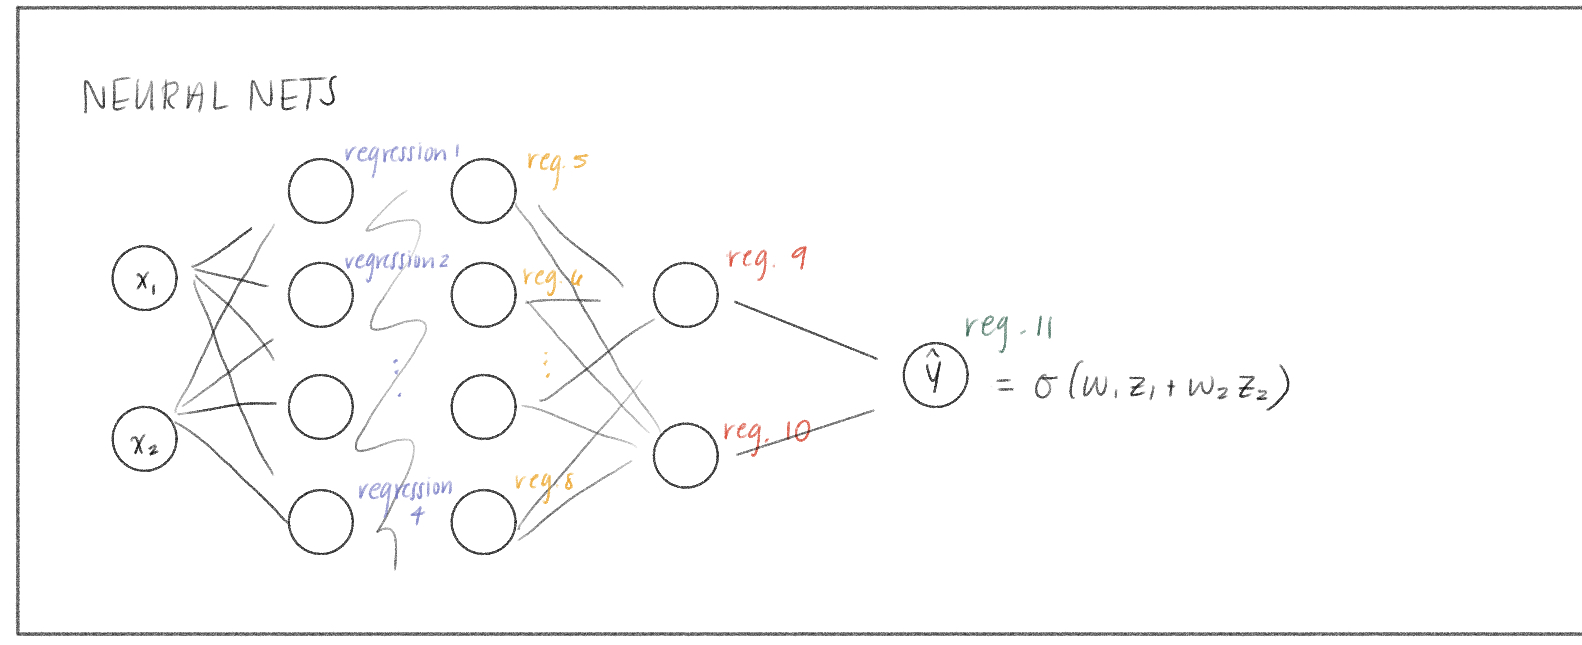

In [12]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'neural-nets.jpg'))

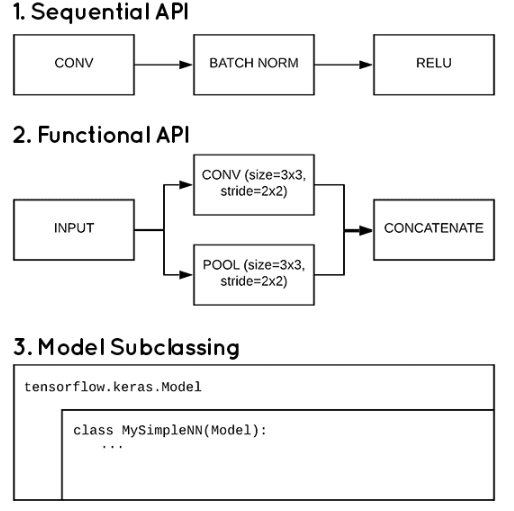

In [14]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'different_ways_to_build_models_in_Keras (1).png'))

## Building Complex Models with the Sequential API

A sequential model is appropriate for a plain stack of layers, where each layer has exactly one input tensor and one output tensor.  

**NOT** appropriate when:  
- model has multiple different sets of input variables, or if it has multiple output variables coming from different processing layers  
- layer sharing  
- you have a sequence of layers that aren't in a step-by-step organization (such as a residual connection or a multi-branch model).  

At least **two** ways of creating the sequential model:  
- adding a layer one-by-one to the sequential model  
- passing a list of layers to the sequential model  

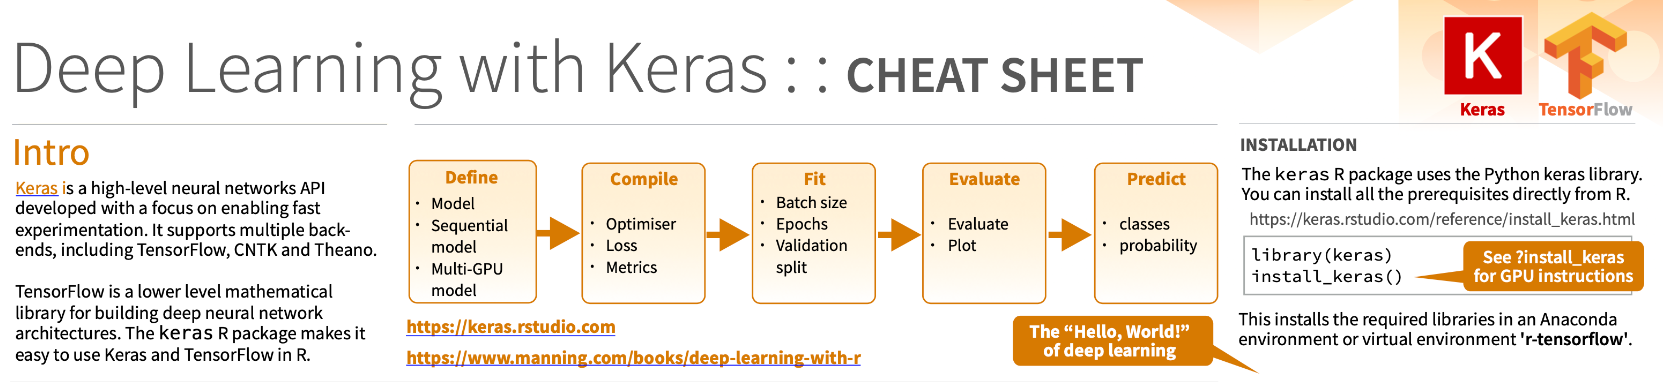

In [16]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'keras_deep_learning (1).png'))

### Method 1: adding a layer one by one

In [17]:
## METHOD 1: adding a layer one-by-one

# set the random seed for reproducible results
# the random weights of the hidden layers and the output layer will be the same

Create the sequential model:

In [18]:
model = tf.keras.Sequential()

Build the input layer  

You need to specify the input shape of a single observation, which isn't including the size of the sample of observations (i.e. the batch).  

This shape is used to create the weight matrix mapping the input data to the units in the first hidden layer.  

In [31]:
# build the first layer (which is an Input layer) and add it to the model
# specify the input shape, which doesn't include the batch size, only the shape of a single observation
# the shape is used to create the connection weight matrix of the first hidden layer

model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

In [32]:
model.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))

Add a normalization layer that takes every feature and computes the batch sample's mean and standard deviation, and then takes the Z-score of each feature in the batch.  

This is a preprocessing step without trainable weights.  

We do this to help convergence of gradient descent.

In [33]:
# next add a preprocessing layer that normalizes continuous features to help convergence of gradient descent
'''The axis or axes that should have a separate mean and variance for each observation in the shape.
For example, if shape is (None, 5) and axis=1, the layer will track 5 separate mean and variance values for the last axis.
When -1, the last axis of the input is assumed to be a feature dimension and is normalized per observation.'''

model.add(tf.keras.layers.Normalization()) # defaults to: axis=-1

Now we can finally start to process our features and attempt to extract signals.  

We will use a dense hidden layer with 10 units and a ReLU activation function.  

See the Dense layer documentation.  

Note: specifying activation="relu" is equivalent to specifying activation=tf.keras.activations.relu.  

For more, see Keras activation function documentation.

In [34]:
# next add a feature processing layer; i.e. a dense hidden layer

# units: Positive integer, dimensionality of the output space.
# activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).

model.add(tf.keras.layers.Dense(units=10, activation="relu"))

Each Dense layer manages its own weight matrix (TF Keras calls it a **kernel**).  

It also manages its own bias vector (where there is one per unit)  

At this step, the model computes activation function for each unit in the hidden layer:  
$h^{[1]}_{W_1,b_1} (X) = \sigma (XW_1 + b_1)$.  

We will then add another feature extraction hidden layer to the sequential model which will compute the subsequent hidden layer as follows:  
$h^{[2]}_{W_2, b_2} (h^{[1]}) = \sigma (h^{[1]} W_2 + b_2)$

In [35]:
model.add(tf.keras.layers.Dense(units=10, activation="relu"))

We sill add one more hidden layer to process the signals through the model.  

By adding another feature extraction hidden layer to the sequential model, the dense neural network will compute the subsequent hidden layer as follows:  
$h^{[3]}_{W_3, b_3} (h^{[2]}) = \sigma (h^{[2]} W_3 + b_3)$

In [36]:
model.add(tf.keras.layers.Dense(units=10, activation="relu"))

Lastly, we will add a final dense layer for the output layer with a single unit and the linear activation function as we are predicting a single return for the SPX index.  

By adding the output layer to the sequential model, the dense neural network will compute the output as follows:  
$\hat{y}^{[4]}_{W_4, b_4} (h^{[3]}) = h^{[3]} W_4 + b_4$

In [37]:
model.add(tf.keras.layers.Dense(units=1)) # defaults to: activation="linear"

You can look through the layers since they are stored in a list.

In [38]:
model.layers

[<Dense name=dense, built=True>,
 <Normalization name=normalization, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>]

You can investigate a single hidden layer's trainable weights.  

Notice the dense layer initialized the connection weights randomly, and the biases are initialized to zero.  

If you want to use a different initialization method, you can set the keyword **kernel_initializer** or **bias_initializer** when creating the layer.

In [39]:
# analyze the weights in the first hidden layer
first_hidden_layer = model.layers[1]

In [40]:
first_hidden_layer.get_weights()

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 0]

In [41]:
kernel, bias = first_hidden_layer.get_weights()

ValueError: too many values to unpack (expected 2)

In [42]:
pd.DataFrame(kernel)

NameError: name 'kernel' is not defined

There is a way to diagnose whether your model has absorbed all the relevant information, called **weightwatcher**. It'll take your weight matrix, decompose into SVD, analyze the singular values, look at histogram of eigenvalues and tell you if that layer has learned everything it could possibly learn or not.  

This is because we lose a lot of **intuition** with these models. They're hard to diagnose.

In [ ]:
bias.shape

In [ ]:
pd.DataFrame(kernel)

We can also look at a summary and a graphical diagram of the sequential model that gives the input and output shapes of each hidden layer, as well as the number of parameters per layer and across the entire model.  

The model's summary() method displays all the model's layers, including each layer's name, its output shape, and its number of parameters

In [ ]:
model.summary()

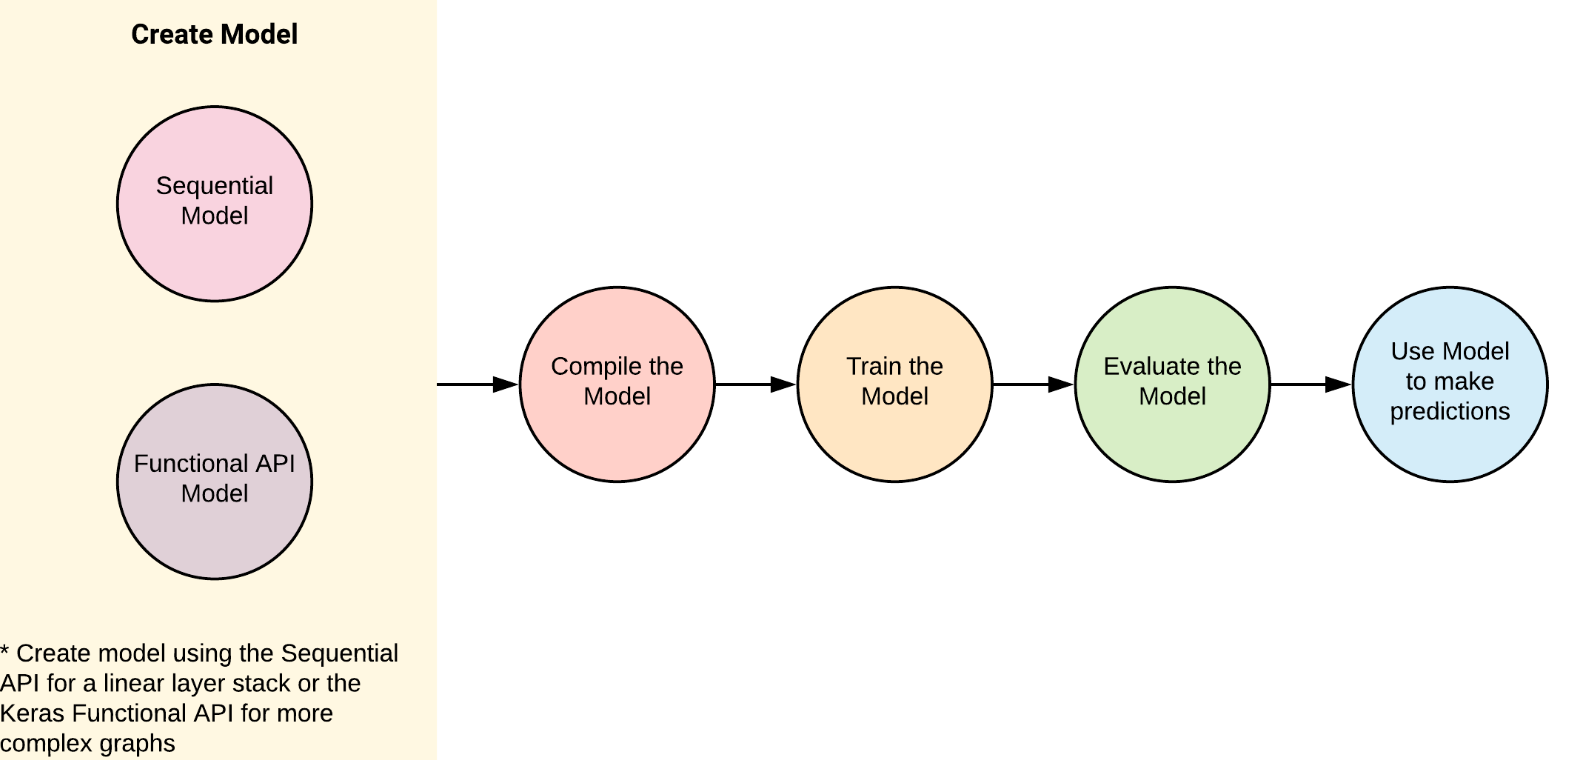

In [20]:
tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'keras_workflow.png'))

### Method 2: Passing a list of layers

In [ ]:
## METHOD 2: passing a list of layers to the Sequential model

# set the random seed for reproducible results
# the random weights of the hidden layers and the output layer will be the same
tf.keras.utils.set_random_seed(42)

Create the sequential model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=1)
])

# it is possible to drop the input layer and instead specify the input_shape in the first layer
# you can also rename the layers and the model by passing the keyword: "name='Layer_Name_for_Interpretability'"
# model = tf.keras.Sequential([
#     tf.keras.layers.Normalization(input_shape=[X_train.shape[1]]),
#     tf.keras.layers.Dense(units=10, activation="relu"),
#     tf.keras.layers.Dense(units=10, activation="relu"),
#     tf.keras.layers.Dense(units=10, activation="relu"),
#     tf.keras.layers.Dense(units=1)
# ])

Each Dense layer manages its own weight matrix (TF Keras calls it a **kernel**).  

It also manages its own bias vector (where there is one per unit)  

At this step, the model computes activation function for each unit in the hidden layer:  
$h^{[1]}_{W_1,b_1} (X) = \sigma (XW_1 + b_1)$.  

We will then add another feature extraction hidden layer to the sequential model which will compute the subsequent hidden layer as follows:  
$h^{[2]}_{W_2, b_2} (h^{[1]}) = \sigma (h^{[1]} W_2 + b_2)$  

We still add one more hidden layer to process the signals through the model.  

By adding another feature extraction hidden layer to the sequential model, the dense neural network will compute the subsequent hidden layer as follows:  
$h^{[3]}_{W_3, b_3} (h^{[2]}) = \sigma (h^{[2]} W_3 + b_3)$  

Lastly, we will add a final dense layer for the output layer with a single unit and the linear activation function as we are predicting a single return for the SPX index.  

By adding the output layer to the sequential model, the dense neural network will compute the output as follows:  
$\hat{y}^{[4]}_{W_4, b_4} (h^{[3]}) = h^{[3]} W_4 + b_4$

model.layers

 You can investigate a single hidden layer's trainable weights, just as before.

In [ ]:
# analyze the weights in the first hidden layer
first_hidden_layer = model.layers[1]

In [ ]:
first_hidden_layer.get_weights()

### Debugging workflow: add() + summary()

When building a new Sequential architecture, it's useful to incrementally stack layers with add() and frequently print model summaries.  

This enables you to monitor how a stack of layers is extracting signals from the features.

In [ ]:
# set the random seed for reproducible results
# the random weights of the hidden layers and the output layer will be the same
tf.keras.utils.set_random_seed(42)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
print(model.summary())

model.add(tf.keras.layers.Normalization())
print(model.summary())

model.add(tf.keras.layers.Dense(units=10, activation="relu"))
print(model.summary())

model.add(tf.keras.layers.Dense(units=10, activation="relu"))
print(model.summary())

model.add(tf.keras.layers.Dense(units=10, activation="relu"))
print(model.summary())

model.add(tf.keras.layers.Dense(units=1))
print(model.summary())

### What to do once we have specified a model architecture?

Now we can **train** our model, **evaluate** our model, and **run inference** (i.e. predict) with our model.

We might also like to save our model to disk, so it can be reused later without having to re-train the model.

We might also like to restore the model once it is saved.

The **compile()** method is used to specify:  

the **loss function**,  

the **optimizer** to use,  

you can also specify a list of extra **metrics** to compute during training and evaluation

In [ ]:
model.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[tf.keras.metrics.R2Score()])

To train the model, we will use a built-in training loop, which we can access by calling the **.fit()** method.  

We pass it the **X_train** and the **Y_train** data, as well as the number of epochs to train (default is 1, which is not enough to converge to a good solution)  

We also can pass a validation set (though its optional).  

- Keras will measure the loss and any extra metrics on this set at the end of each epoch, which is useful to see how the model performs.  

- If your performance is much better than on the training set than on the validation set, then your model is probably overfitting the training set, or there is a bug, or some sort of data leakage (a lookahead bias).

The fit() method is used to specify  

the training set,  

the validation set,  

the number of epochs,  

the batch size

In [ ]:
'''
validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data.
                  The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
                  The validation data is selected from the last samples in the x and y data provided, before shuffling. This argument is not supported when x is a dataset, generator or keras.utils.PyDataset instance.
                  If both validation_data and validation_split are provided, validation_data will override validation_split.

validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.
                 The model will not be trained on this data.
                 Thus, note the fact that the validation loss of data provided using validation_split or validation_data is not affected by regularization layers like noise and dropout.
                 validation_data will override validation_split.
                 It could be:
                      A tuple (x_val, y_val) of NumPy arrays or tensors.
                      A tuple (x_val, y_val, val_sample_weights) of NumPy arrays.
                      A tf.data.Dataset.
                      A Python generator or keras.utils.PyDataset returning (inputs, targets) or (inputs, targets, sample_weights).

shuffle: Boolean, whether to shuffle the training data before each epoch.
         This argument is ignored when x is a generator or a tf.data.Dataset.'''

history = model.fit(X_train, Y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=True, shuffle=False)

# history = model.fit(X_sub_train, Y_sub_train, epochs=150, batch_size=32, validation_data=(X_validation, Y_validation))

The **fit()** method returns a **History object** containing:  

- the training parameters (history.params)  
- the list of epochs it went through (history.epoch)  
- and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any).  

If you use this dictionary to create a Pandas DataFrame and call its plot() method, you get the learning curves, which we have done.

In [ ]:
history.params

In [ ]:
history = pd.DataFrame(history.history)

history

In [ ]:
history[['loss', 'val_loss']].plot()

In [ ]:
history[['r2_score', 'val_r2_score']].plot()

In [ ]:
history[['loss', 'val_loss']].plot(ylim=[-0.01, 0.05])

In [ ]:
history[['r2_score', 'val_r2_score']].plot(ylim=[-1,1])

At each epoch of training, Keras displays the number of mini-batches processed on the left-side of the progress bar.  
- The batch size defaults to samples of size 32.  
- After the progress bar, you can see the average training time per sample (not per batch of samples), and the loss and other metrics on both the training set and validation set.  

Instead of passing a validation set using the validation_data argument, you could set validation_split to the ratio of the training set that you want Keras to use for validation. For example, validation_split=0.1 tells Keras to use the last 10% of the data (before shuffling) for validation.  
- We must be very careful not to introduce a lookahead bias with our validation set choices.  

**Note**: The validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch.

In [ ]:
'''
validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data.
                  The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
                  The validation data is selected from the last samples in the x and y data provided, before shuffling. This argument is not supported when x is a dataset, generator or keras.utils.PyDataset instance.
                  If both validation_data and validation_split are provided, validation_data will override validation_split.

validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.
                 The model will not be trained on this data.
                 Thus, note the fact that the validation loss of data provided using validation_split or validation_data is not affected by regularization layers like noise and dropout.
                 validation_data will override validation_split.
                 It could be:
                      A tuple (x_val, y_val) of NumPy arrays or tensors.
                      A tuple (x_val, y_val, val_sample_weights) of NumPy arrays.
                      A tf.data.Dataset.
                      A Python generator or keras.utils.PyDataset returning (inputs, targets) or (inputs, targets, sample_weights).

shuffle: Boolean, whether to shuffle the training data before each epoch.
         This argument is ignored when x is a generator or a tf.data.Dataset.'''

history = model.fit(X_train, Y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=True, shuffle=False)

# history = model.fit(X_sub_train, Y_sub_train, epochs=150, batch_size=32, validation_data=(X_validation, Y_validation))

In [ ]:
history = pd.DataFrame(history.history)

history

In [ ]:
history[['loss', 'val_loss']].plot(ylim=[-0.01, 0.01])

In [ ]:
history[['r2_score', 'val_r2_score']].plot(ylim=[-1,1])